In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
#importing all relevant liabraries

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [46]:
path = "/content/drive/MyDrive/Koushik's Portfolio/telecom_churn_data.csv"
df = pd.read_csv(path)
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [47]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 250)

df_numeric = df.select_dtypes(include=['float64', 'int64'])
df_dates = df.select_dtypes(include=['object'])
date_cols = df_dates.columns

# create column name list by types of columns
id_cols = ['mobile_number', 'circle_id']


cat_cols =  ['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',
             'night_pck_user_9',
             'fb_user_6',
             'fb_user_7',
             'fb_user_8',
             'fb_user_9'
            ]

num_cols = [column for column in df_numeric.columns if column not in id_cols + cat_cols]


In [48]:
# Handling Missing Values

# create a list of recharge columns where we will impute missing values with zeroes
zero_impute = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9'
       ]
# impute missing values with 0
df[zero_impute] = df[zero_impute].apply(lambda x: x.fillna(0))


In [49]:
#lets drop date columns and id columns

df = df.drop(id_cols, axis=1)
df = df.drop(date_cols, axis=1)

In [50]:
#for Categorical variables, replacing null values with -1

df[cat_cols] = df[cat_cols].fillna(-1)

In [51]:
#As suggested by SME, dropping columns which has more than 70% null values
initial_cols = df.shape[1]

perc = 0.7

include_cols = list(df.apply(lambda column: True if column.isnull().sum()/df.shape[0] < perc else False))

drop_nulls = pd.DataFrame({'features':df.columns , 'include': include_cols})
drop_nulls.loc[drop_nulls.include == True,:]

,features,include
0,loc_og_t2o_mou,True
1,std_og_t2o_mou,True
2,loc_ic_t2o_mou,True
3,arpu_6,True
4,arpu_7,True
5,arpu_8,True
6,arpu_9,True
7,onnet_mou_6,True
8,onnet_mou_7,True
9,onnet_mou_8,True


In [52]:
churn = df.loc[:, include_cols]

dropped_cols = churn.shape[1] - initial_cols
print("{0} columns dropped.".format(dropped_cols))

-16 columns dropped.


In [53]:
#imputing rest of the columns with 0

threshold = 0.0
cols_impute = list(churn.apply(lambda x: True if x.isnull().sum()/churn.shape[0] == threshold else False))
impute = pd.DataFrame({'features': churn.columns, 'include':cols_impute})


In [54]:
#imputing rest of the columns with 0
x = impute.loc[impute['include']== False, :]['features'].tolist()
churn[x] = churn[x].fillna(0)

## Filter High value Customers

In [55]:
churn['total_data_rech_6'] = churn['total_rech_data_6'] * churn['av_rech_amt_data_6']
churn['total_data_rech_7'] = churn['total_rech_data_7'] * churn['av_rech_amt_data_7']

# calculate total recharge amount for June and July --> call recharge amount + data recharge amount
churn['amt_data_6'] = churn['total_rech_amt_6'] + churn['total_data_rech_6']
churn['amt_data_7'] = churn['total_rech_amt_7'] + churn['total_data_rech_7']

# calculate average recharge done by customer in June and July
churn['av_amt_data_good_phase'] = (churn.amt_data_6 + churn.amt_data_7)/2

In [56]:
hv_customers = churn[churn['av_amt_data_good_phase'] >= churn['av_amt_data_good_phase'].quantile(0.7)]
hv_customers = hv_customers.reset_index()
hv_customers['av_amt_data_good_phase'].describe(percentiles=[0.01, 0.25, 0.75, 0.99])

count    30001.000000
mean      1152.620628
std       1358.713982
min        478.000000
1%         482.500000
25%        603.000000
50%        800.000000
75%       1208.000000
99%       6090.500000
max      61236.000000
Name: av_amt_data_good_phase, dtype: float64

In [57]:
#treating outliers

upper_limit = 1.5*(hv_customers['av_amt_data_good_phase']. quantile(0.99))
hv_customers = hv_customers[hv_customers['av_amt_data_good_phase'] <= upper_limit]
hv_customers.shape

(29872, 202)

In [58]:
hv_customers = hv_customers.drop(['total_data_rech_6', 'total_data_rech_7',
                                      'amt_data_6', 'amt_data_7', 'index'], axis=1)

In [59]:
hv_customers.shape

(29872, 197)

## Derive Churn

In [60]:
#churn conditions as per case study

cond1 = (hv_customers['total_ic_mou_9'] == 0)
cond2 = (hv_customers['total_og_mou_9'] == 0)

cond3 = (hv_customers['vol_2g_mb_9'] == 0)
cond4 = (hv_customers['vol_3g_mb_9'] == 0)
hv_customers[cond1 & cond2 & cond3 & cond4].shape

(2434, 197)

In [61]:
#tagging churn

hv_customers['consumption'] = hv_customers['total_ic_mou_9'] + hv_customers['total_og_mou_9'] + hv_customers['vol_2g_mb_9'] + hv_customers['vol_3g_mb_9']


hv_customers['churn'] = hv_customers['consumption'].apply(lambda x: 1 if x == 0 else 0 )

churn_rate = 100*hv_customers['churn'].value_counts()[1]/(hv_customers['churn'].value_counts()[0]+hv_customers['churn'].value_counts()[1])
churn_rate

8.148098553829673

In [62]:
#remove all the attributes corresponding to the churn phase i.e all attributes having ‘ _9’, etc. in their names
columns = list(hv_customers.columns)
cols = []
for i in columns:
    if i[-1] == '9':
        cols.append(i)
        
df_final = hv_customers.drop(cols, axis=1)
df_final.shape

(29872, 152)

## Difference Between Good Phase and Action Phase in some important variables

In [63]:
#Lets find out Good Phase

all_columns = list(df_final.columns)
b = [] #column ends with '_6'
c = [] #column ends with '_7'
d = [] #column ends with '_8'
e = [] #categorical columns
for i in all_columns:
    if i[-1] == '6':
        b.append(i),
    elif i[-1] == '7':
        c.append(i),
    elif i[-1] == '8':
        d.append(i),
    else:
        e.append(i)
        
column_without_suffix = [i.strip('_6') for i in b]

#dataframe consisting columns with suffix '_6'
df_6 = df_final[b] 
df_6.columns = column_without_suffix

#dataframe consisting columns with suffix '_7'
df_7 = df_final[c]
df_7.columns = column_without_suffix

#dataframe consisting columns with suffix '_8'
df_8 = df_final[d]
df_8.columns = column_without_suffix


#Good Phase
avg_of_jun_jul = pd.concat([df_6, df_7]).groupby(level=0).mean()
#avg_of_jun_jul.head()

#Difference between Good Phase and Action Phase

phase_difference = df_8.subtract(avg_of_jun_jul, fill_value=0)
phase_difference.head()

,arpu,onnet_mou,offnet_mou,roam_ic_mou,roam_og_mou,loc_og_t2t_mou,loc_og_t2m_mou,loc_og_t2f_mou,loc_og_t2c_mou,loc_og_mou,std_og_t2t_mou,std_og_t2m_mou,std_og_t2f_mou,std_og_t2c_mou,std_og_mou,isd_og_mou,spl_og_mou,og_others,total_og_mou,loc_ic_t2t_mou,loc_ic_t2m_mou,loc_ic_t2f_mou,loc_ic_mou,std_ic_t2t_mou,std_ic_t2m_mou,std_ic_t2f_mou,std_ic_t2o_mou,std_ic_mou,total_ic_mou,spl_ic_mou,isd_ic_mou,ic_others,total_rech_num,total_rech_amt,max_rech_amt,last_day_rch_amt,total_rech_data,max_rech_data,av_rech_amt_data,vol_2g_mb,vol_3g_mb,night_pck_user,monthly_2g,sachet_2g,monthly_3g,sachet_3g,fb_user
0,7.7025,0.00,0.000,0.00,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.00,0.0,0.000,0.000,0.00,0.0,0.000,0.160,4.130,1.150,5.440,0.000,0.000,0.000,0.0,0.000,5.440,0.000,0.000,0.000,-1.5,-55.0,0.0,0.0,0.0,0.0,0.0,-9.975,-7.555,0.0,0.0,0.0,0.0,0.0,0.0
1,1961.9650,-3.97,-184.385,6.78,19.895,-1.105,-215.725,-5.405,0.00,-222.245,-1.785,8.315,3.31,0.0,9.840,9.920,4.25,0.0,-198.225,-17.890,-98.335,-87.280,-203.515,6.030,32.115,-21.005,0.0,17.130,-163.510,-0.105,23.295,-0.325,2.0,2453.0,395.0,779.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0
2,-298.1100,-347.28,48.835,0.00,0.000,-244.870,-25.230,0.000,7.15,-270.095,-102.415,63.825,0.00,0.0,-38.590,0.000,10.23,0.0,-298.450,-16.530,-20.300,0.000,-36.840,-0.190,-12.605,0.000,0.0,-12.795,-49.635,0.000,0.000,0.000,-6.0,-399.0,-92.0,-15.0,2.0,-54.0,-19.5,-177.970,-363.535,0.5,-0.5,2.5,0.0,0.0,1.0
3,81.6570,-32.12,156.085,0.00,0.000,18.020,14.940,1.205,0.00,34.175,-50.145,139.940,0.00,0.0,89.800,0.000,0.00,0.0,123.975,13.205,32.730,6.665,52.605,-9.840,48.780,0.000,0.0,38.945,91.550,0.000,0.000,0.000,3.0,78.0,0.0,25.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0
4,232.8425,-16.23,118.505,0.00,0.000,-16.230,65.585,0.000,17.71,49.345,0.000,35.255,0.00,0.0,35.255,-0.005,17.66,0.0,102.270,35.765,42.205,0.710,78.690,13.125,35.250,0.000,0.0,48.375,127.095,0.000,-10.375,10.385,0.0,212.0,89.5,-89.5,1.0,89.5,92.0,-0.230,710.375,0.5,0.0,0.0,0.0,1.0,1.0


In [64]:
drop = ['loc_og_t2t_mou', 'loc_og_t2m_mou', 'loc_og_t2f_mou', 'loc_og_t2c_mou','std_og_t2t_mou', 'std_og_t2m_mou', 'std_og_t2f_mou',
'std_og_t2c_mou','og_others','loc_ic_t2t_mou', 'loc_ic_t2m_mou', 'loc_ic_t2f_mou','std_ic_t2t_mou', 'std_ic_t2m_mou', 'std_ic_t2f_mou',
       'std_ic_t2o_mou','ic_others','last_day_rch_amt','night_pck_user',
       'monthly_2g', 'sachet_2g', 'monthly_3g', 'sachet_3g', 'fb_user']

phase_difference = phase_difference.drop(drop, axis=1)

In [65]:
phase_difference.shape

(29872, 23)

In [66]:
data_prepared = pd.concat([df_final, phase_difference], axis=1)
data_prepared.shape

(29872, 175)

In [67]:
data_prepared.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,av_amt_data_good_phase,consumption,churn,arpu,onnet_mou,offnet_mou,roam_ic_mou,roam_og_mou,loc_og_mou,std_og_mou,isd_og_mou,spl_og_mou,total_og_mou,loc_ic_mou,std_ic_mou,total_ic_mou,spl_ic_mou,isd_ic_mou,total_rech_num,total_rech_amt,max_rech_amt,total_rech_data,max_rech_data,av_rech_amt_data,vol_2g_mb,vol_3g_mb
0,0.0,0.0,0.0,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,3.58,559.0,0.00,1,7.7025,0.00,0.000,0.00,0.000,0.000,0.000,0.000,0.00,0.000,5.440,0.000,5.440,0.000,0.000,-1.5,-55.0,0.0,0.0,0.0,0.0,-9.975,-7.555
1,0.0,0.0,0.0,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.0,0.0,0.0,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,

In [68]:
# aggregate the categorical variables
data_prepared.groupby('night_pck_user_6').churn.mean()
data_prepared.groupby('night_pck_user_7').churn.mean()
data_prepared.groupby('night_pck_user_8').churn.mean()
data_prepared.groupby('fb_user_6').churn.mean()
data_prepared.groupby('fb_user_7').churn.mean()
data_prepared.groupby('fb_user_8').churn.mean()

# replace categories with aggregated values in each categorical column
mapping = {'night_pck_user_6' : {-1: 0.099165, 0: 0.066797, 1: 0.087838},
           'night_pck_user_7' : {-1: 0.115746, 0: 0.055494, 1: 0.051282},
           'night_pck_user_8' : {-1: 0.141108, 0: 0.029023, 1: 0.016194},
           'fb_user_6'        : {-1: 0.099165, 0: 0.069460, 1: 0.067124},
           'fb_user_7'        : {-1: 0.115746, 0: 0.059305, 1: 0.055082},
           'fb_user_8'        : {-1: 0.141108, 0: 0.066887, 1: 0.024463}
          }
data_prepared.replace(mapping, inplace = True)

# MODELLING

In [69]:
# import required libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [70]:
y = data_prepared.pop('churn')
x = data_prepared

In [71]:
x_train, x_test, y_train, y_test = train_test_split( x, y, train_size = 0.7, test_size= 0.3, random_state=100, stratify= y)

In [72]:
scale = StandardScaler()
x_train_scaled = scale.fit_transform(x_train)
x_test_scaled = scale.transform(x_test)

# PRINCIPAL COMPONENT ANALYSIS

In [74]:
pca = PCA(random_state=100)
pca.fit(x_train_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=100,
    svd_solver='auto', tol=0.0, whiten=False)

In [75]:
pca.components_

array([[-3.08977882e-19, -2.77555756e-16, -1.11022302e-16, ...,
         2.43199368e-02,  1.87925110e-02,  5.18903286e-03],
       [-1.01282563e-19, -4.85722573e-17, -1.94289029e-16, ...,
         3.46803120e-02,  1.03171041e-02,  3.53061275e-02],
       [ 3.52691640e-19,  5.55111512e-17, -3.33066907e-16, ...,
         6.90667812e-02,  1.90936308e-02,  5.95346563e-02],
       ...,
       [ 0.00000000e+00,  1.55743053e-01, -7.86787181e-02, ...,
        -3.98503755e-03,  9.07344471e-05,  1.31384607e-03],
       [-0.00000000e+00, -7.57574672e-02, -4.84692520e-02, ...,
        -2.17414187e-02, -2.60694411e-03, -1.24521545e-02],
       [ 0.00000000e+00,  3.96069778e-01, -4.45277309e-01, ...,
        -6.83945369e-02,  9.43959323e-03, -1.69209324e-02]])

In [76]:
pca.explained_variance_ratio_

array([1.00243935e-01, 8.03238005e-02, 5.53314608e-02, 4.55473773e-02,
       3.92156437e-02, 3.55316589e-02, 2.78617244e-02, 2.52324469e-02,
       2.35354412e-02, 2.14626196e-02, 2.07000357e-02, 1.92987743e-02,
       1.85404509e-02, 1.76861972e-02, 1.71350644e-02, 1.68340452e-02,
       1.52396815e-02, 1.44070106e-02, 1.42119210e-02, 1.29708137e-02,
       1.28427771e-02, 1.23302352e-02, 1.22055046e-02, 1.15517741e-02,
       1.10360620e-02, 1.07604261e-02, 1.04843634e-02, 1.03853629e-02,
       1.03127904e-02, 1.00633675e-02, 9.68651034e-03, 9.50706463e-03,
       9.20499797e-03, 9.01866032e-03, 8.65733059e-03, 8.15957722e-03,
       8.05088428e-03, 7.65411557e-03, 7.56605189e-03, 7.32784580e-03,
       7.07617175e-03, 6.90326055e-03, 6.73529146e-03, 6.17781173e-03,
       5.73426302e-03, 5.51838311e-03, 5.27741337e-03, 5.20157010e-03,
       5.10021462e-03, 4.96936578e-03, 4.74871468e-03, 4.57322678e-03,
       4.46802562e-03, 4.42598739e-03, 4.02832554e-03, 3.96185757e-03,
      

In [77]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

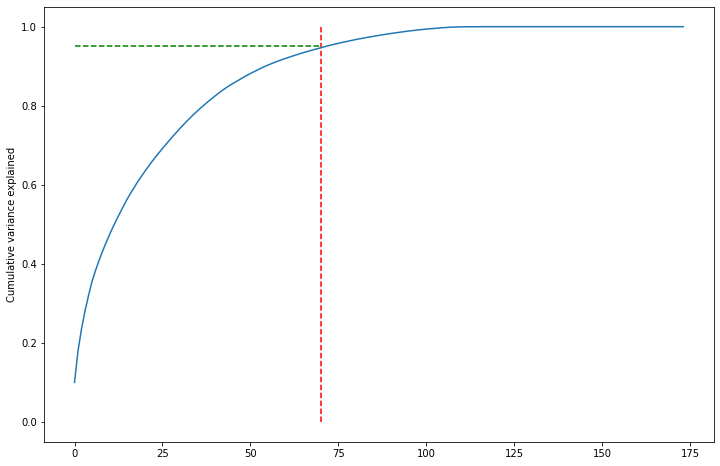

In [78]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=70, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=70, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [79]:
pca = PCA(0.95)
x_train_pca = pca.fit_transform(x_train_scaled)
x_train_pca.shape

(20910, 73)

# XGboost algorithm for prediction

In [80]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics

In [81]:

xgb_model = xgb.XGBClassifier(class_weight= 'balanced', random_state=100)

# Default-Run of default-hyperparameters
parameters = {'learning_rate': [0.01, 0.02, 0.05],
              'max_depth': [5,10, 15],
              'min_child_weight': [1,5,7,10],
              'n_estimators': [1000, 1500, 2000, 3000],
              'colsample_bytree':[0.6,0.8,1.0],
              'subsample':[0.5, 0.6, 0.7],
             'gamma': [0.1, 0.5, 1]
             }

scorer = metrics.make_scorer(metrics.roc_auc_score,
                             greater_is_better=True,
                             needs_proba=True,
                             needs_threshold=False)


folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 100)
clf_xgb = RandomizedSearchCV(xgb_model, 
                             param_distributions = parameters, 
                             scoring=scorer,
                             n_jobs=-1,
                             cv= folds)
                       


In [ ]:
clf_xgb.fit(x_train_pca, y_train)

In [ ]:
print(clf_xgb.best_params_)
print(clf_xgb.best_score_)
print(clf_xgb.best_estimator_)

In [ ]:
x_test_pca = pca.transform(x_test_scaled)


In [ ]:

final_model = xgb.XGBClassifier(learning_rate=0.05,
                                max_depth=4,
                                min_child_weight=1,
                                gamma = 0.1,
                                colsample_bytree= 1.0,
                                subsample = 0.7,
                                n_estimators=2000)

final_model.fit(x_train_pca, y_train)
print('AUC on train data by XGBoost =', metrics.roc_auc_score(y_true=y_train,
                                                              y_score=final_model.predict_proba(x_train_pca)[:, 1]))

print('AUC on test data by XGBoost =', metrics.roc_auc_score(y_true=y_test,
                                                             y_score=final_model.predict_proba(x_test_pca)[:, 1]))

AUC on train data by XGBoost = 1.0
AUC on test data by XGBoost = 0.9622984810362503


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

def evaluate_model(final_model):
    print("Train Accuracy :", accuracy_score(y_train, final_model.predict(x_train_pca)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, final_model.predict(x_train_pca)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, final_model.predict(x_test_pca)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, final_model.predict(x_test_pca)))

In [ ]:
evaluate_model(final_model)

Train Accuracy : 1.0
Train Confusion Matrix:
[[19206     0]
 [    0  1704]]
--------------------------------------------------
Test Accuracy : 0.9456594510153984
Test Confusion Matrix:
[[8104  128]
 [ 359  371]]


In [ ]:
print(classification_report(y_test, final_model.predict(x_test_pca)))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      8232
           1       0.74      0.51      0.60       730

    accuracy                           0.95      8962
   macro avg       0.85      0.75      0.79      8962
weighted avg       0.94      0.95      0.94      8962



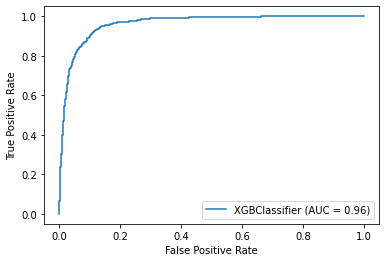

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(final_model, x_test_pca, y_test)
plt.show()

# Random Forest for interpretability

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=4113, verbose=0,
                       warm_start=False)

In [ ]:
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=4113, verbose=0,
                       warm_start=False)

In [ ]:
print(classification_report(y_test,rf.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8232
           1       1.00      0.96      0.98       730

    accuracy                           1.00      8962
   macro avg       1.00      0.98      0.99      8962
weighted avg       1.00      1.00      1.00      8962



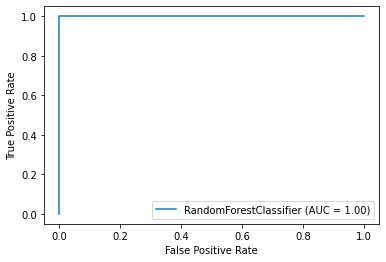

In [ ]:
import matplotlib.pyplot as plt
plot_roc_curve(rf, x_train,y_train)
plt.show()

In [ ]:
rf.feature_importances_

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.61402808e-03,
       2.49763472e-03, 1.39511335e-02, 1.73132886e-03, 1.54326330e-03,
       5.61706893e-03, 2.02090897e-03, 2.11380828e-03, 8.54762642e-03,
       9.47792258e-04, 1.79473832e-03, 8.54005384e-03, 8.01951603e-04,
       2.18536763e-03, 1.31422307e-02, 1.42147335e-03, 1.98244293e-03,
       2.04426523e-02, 1.99040328e-03, 1.85394652e-03, 1.18133149e-02,
       1.17489695e-03, 1.07452280e-03, 3.90911693e-03, 6.80224344e-04,
       5.97761523e-04, 7.71851605e-04, 1.93461106e-03, 1.89631071e-03,
       1.71512800e-02, 1.55145081e-03, 1.13784121e-03, 1.60672093e-03,
       1.39930978e-03, 1.22997390e-03, 1.95925579e-03, 4.22391851e-04,
       4.42698842e-04, 3.32084275e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.58622475e-03, 1.68712469e-03, 3.20608205e-03,
       4.77725162e-04, 4.34203778e-04, 4.78867011e-04, 7.24611839e-04,
       1.17079327e-03, 1.17415441e-03, 7.22164405e-04, 6.77015344e-05,
      

# Summary table of Featute Importance

In [ ]:
imp_df = pd.DataFrame({
    "varname":x_train.columns,
    "Imp":rf.feature_importances_
})

In [ ]:
pd.set_option("display.max_rows",None)

imp_df.sort_values(by="Imp",ascending=False)

,varname,Imp
149,consumption,0.330994
71,loc_ic_mou_8,0.055421
110,last_day_rch_amt_8,0.031098
62,loc_ic_t2t_mou_8,0.028468
89,total_ic_mou_8,0.027443
65,loc_ic_t2m_mou_8,0.025793
59,total_og_mou_8,0.024136
20,loc_og_t2t_mou_8,0.020443
104,total_rech_amt_8,0.020079
32,loc_og_mou_8,0.017151


### Results we have come across using other algorithms in different models

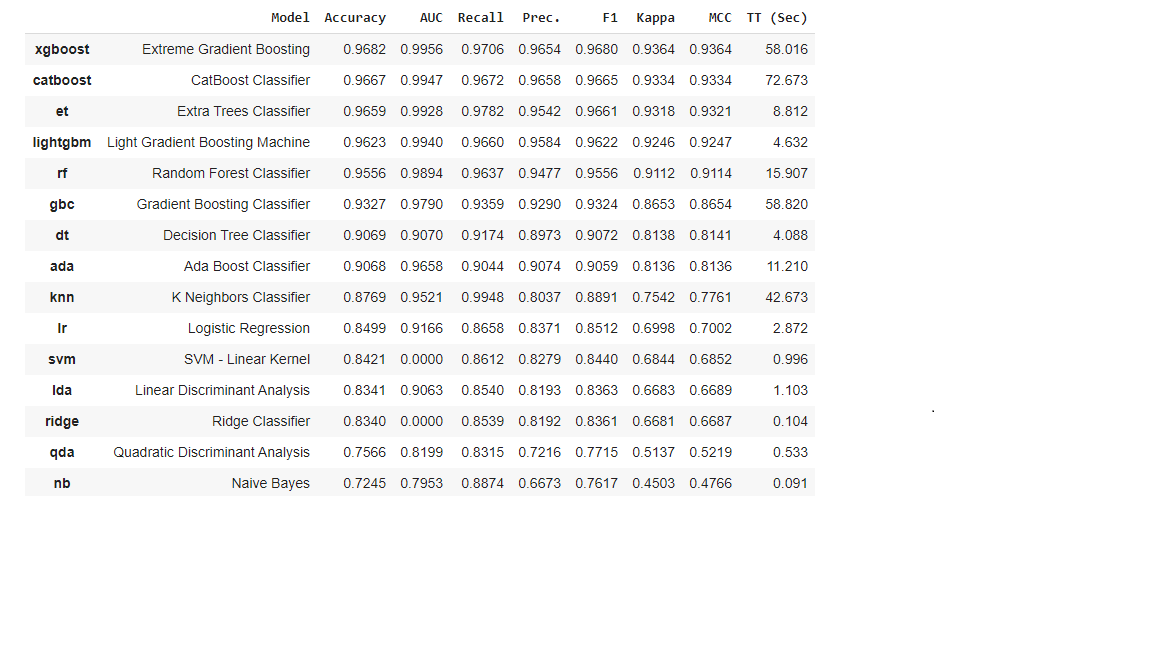

# Recommendation of business strategies

From the feature importance table we can come to conclusion that the variable 'Consumption' which was derived from adding internet and talk time usage is an important variable as it leads us to make an intution that customer not using talk time and internet are high likely to churn. So telecom companies can start offering lucrative promotional deals in ordere to prevent loss of customers.

We also saw local incoming calls and last recharge amount stood as second and third important features so they can make offers and analyse them to make fruitful policies
